In [1]:
"""
Shabda's book log
"""
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('data/shabda_goodreads_export.csv')

In [4]:
df

,Book Id,Title,Author,Author l-f,Additional Authors,ISBN,ISBN13,My Rating,Average Rating,Publisher,...,Private Notes,Read Count,Recommended For,Recommended By,Owned Copies,Original Purchase Date,Original Purchase Location,Condition,Condition Description,BCID
0,386372,"Mort (Discworld, #4; Death, #1)",Terry Pratchett,"Pratchett, Terry",NaN,"=""0061020680""","=""9780061020681""",0,4.17,HarperTorch,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
1,18807413,The Rámáyan of Válmíki,Vālmīki,"Vālmīki, Vālmīki",Ralph T.H. Griffith,"=""""","=""""",0,4.14,Public Domain Books,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
2,19031611,The Rocket Spanish Quick-Start Guide to Spanis...,Mauricio Evlampieff,"Evlampieff, Mauricio",NaN,"=""""","=""9780992256821""",2,2.80,Smashwords Edition,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
3,22573236,Because Dragons Love Milk,Marie Chow,"Chow, Marie",NaN,"=""""","=""""",4,4.56,"Career Student, LLC",...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
4,19187183,THE RAMAYANA,Ramesh Menon,"Menon, Ramesh",NaN,"=""""","=""9789350292792""",0,4.24,HarperCollins Publishers India,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
5,25239029,Into the Brambles,Daniel Greenfeld,"Greenfeld, Daniel",Audrey Roy Greenfeld,"=""""","=""""",0,4.67,Two Scoops Press,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
6,24080225,Mansarovar - Part 1 (Hindi),Premchand,"Premchand, Premchand",NaN,"=""""","=""""",5,5.00,Sai ePublications,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
7,13141699,Good Omens,Terry Pratchett,"Pratchett, Terry",Neil Gaiman,"=""""","=""""",4,4.26,NaN,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
8,10962171,The Fresh Brew: Chronicles Of Business And Fre...,Amit Haralalka,"Haralalka, Amit","Amitabh Thakur, A.P.J. Abdul Kalam","=""8180460630""","=""9788180460630""",0,3.10,Alchemy Business,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
9,105576,Five Point Someone: What Not to Do at IIT,Chetan Bhagat,"Bhagat, Chetan",NaN,"=""8129104598""","=""9788129104595""",3,3.46,Rupa and Co,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN


In [68]:
author_pivot = df.groupby('Author', squeeze=True).count()

In [69]:
auth_count_gt_two = author_pivot[author_pivot['Book Id']>2]['Title'].copy()

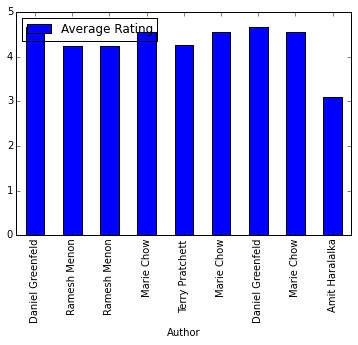

In [70]:
auth_list = map(lambda x: x, auth_count_gt_two.index)
x=df.loc[auth_count_gt_two]
pd.DataFrame({'Average Rating': x['Average Rating'], 'Author': x['Author']}).plot('Author',kind='bar')

In [77]:
df1=df[['Title', 'Author', 'My Rating','Average Rating', 'Publisher']]
df1 = df1.T.drop_duplicates().T

In [119]:
df2 = pd.DataFrame({'rating':df1.groupby('Author').sum()['My Rating'],'count':author_pivot['Title']})
df3 = pd.DataFrame({'rating':df1.groupby('Publisher').sum()['My Rating'],'count':publisher_pivot['Title']})

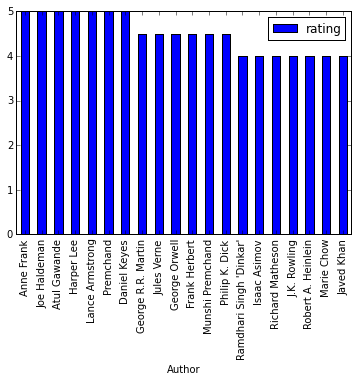

In [123]:
"""
Average rating for author. Top 20
"""
pd.DataFrame({'rating':df2['rating']/df2['count']}).sort('rating', ascending=False)[:20].plot(kind='bar')

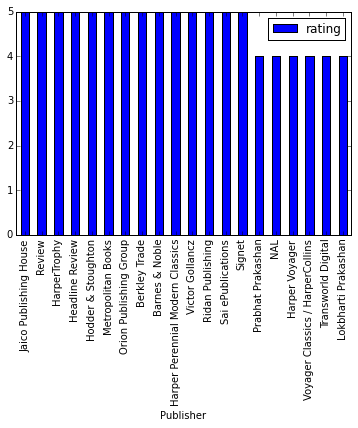

In [122]:
"""
Average rating for publisher. Top 20
"""
pd.DataFrame({'rating':df3['rating']/df3['count']}).sort('rating', ascending=False)[:20].plot(kind='bar')

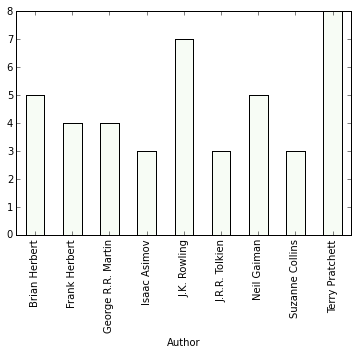

In [9]:
"""
Authors with two or more entries.
"""
auth_count_gt_two.plot(kind='bar', colormap='Greens')

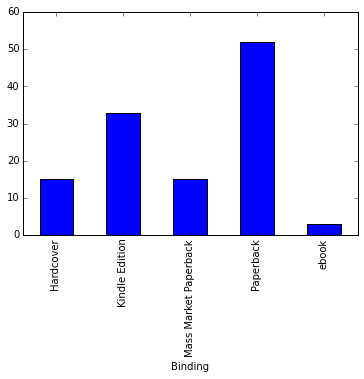

In [10]:
"""
Type of books read.
"""
binding_pivot = df.groupby('Binding').count()
binding_pivot['Title'].plot(kind='bar')

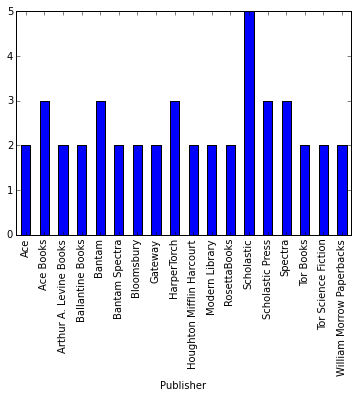

In [11]:
"""
Plotting Favorite publishers with more than or equal to two entries.
"""
publisher_pivot = df.groupby('Publisher').count()
publisher_pivot[publisher_pivot['Title']>=2]['Title'].plot(kind='bar')